In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 10), dpi=100, facecolor='w', edgecolor='k')
import pandas as pd
from scipy.stats import zscore, norm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import truncnorm, norm
from scipy.optimize import fmin_slsqp
import qvalue as qv

In [7]:
pca_per_pathway = pd.read_csv('../data/pca_per_pathway.csv', index_col=0)
mutations = pd.read_csv("../data/mutations_per_patients.csv", index_col=0)
full_df = pd.concat([pca_per_pathway, mutations.reindex(pca_per_pathway.index)], axis=1)

In [12]:
mutations.columns.tolist()

['TP53',
 'MLLT4',
 'NF2',
 'SF3B1',
 'NT5E',
 'EGFR',
 'PRKCQ',
 'AHNAK',
 'CLK3',
 'ERBB2',
 'MUC16',
 'EP300',
 'HIST1H2BC',
 'UBR5',
 'USP28',
 'AHNAK2',
 'BIRC6',
 'PIK3CA',
 'MAP3K13',
 'COL12A1',
 'FOXO3',
 'SYNE1',
 'NRG3',
 'DNAH2',
 'NF1',
 'SETDB1',
 'COL6A3',
 'ATR',
 'KMT2C',
 'GPR124',
 'ARID2',
 'ERBB3',
 'SIK1',
 'TAF1',
 'PTEN',
 'AKT1',
 'FANCA',
 'MLL2',
 'BRCA1',
 'DNAH11',
 'AKAP9',
 'STAB2',
 'HERC2',
 'CACNA2D3',
 'RYR2',
 'PALLD',
 'ARID1A',
 'LAMB3',
 'SBNO1',
 'NCOA3',
 'STK11',
 'MAP3K1',
 'PIK3R1',
 'UTRN',
 'TG',
 'HRAS',
 'FANCD2',
 'SHANK2',
 'NPNT',
 'USH2A',
 'PBRM1',
 'CDH1',
 'MYH9',
 'MAP2K4',
 'NCOR1',
 'PTPRD',
 'TBX3',
 'CBFB',
 'CTCF',
 'RUNX1',
 'COL22A1',
 'NCOR2',
 'DNAH5',
 'GATA3',
 'AFF2',
 'ALK',
 'MAP3K10',
 'BRCA2',
 'KDM3A',
 'FAM20C',
 'MAGEA8',
 'L1CAM',
 'PRKCZ',
 'GPS2',
 'USP9X',
 'PTPN22',
 'PDE4DIP',
 'GPR32',
 'LARGE',
 'THSD7A',
 'SIAH1',
 'LAMA2',
 'HDAC9',
 'ARID1B',
 'FLT3',
 'PRKCE',
 'AGTR2',
 'PTPRM',
 'CTNNA3',
 'CTNNA1'

In [13]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import qvalue as qv

clusterframes = {}


for i in mutations.columns.tolist():

    df_cluster = pd.DataFrame(index=pca_per_pathway.columns) 
    pvaluelist = []
    for pathway in df_cluster.index:
        results = ols("Q(pathway) ~ C(Q(i))", data=full_df).fit()
        table = sm.stats.anova_lm(results, typ=2)
        pvalue = table['PR(>F)'][0]
        pvaluelist.append(pvalue)
    
    df_cluster['p-values'] = pvaluelist
    qv.qvalues(df_cluster, 'p-values', 'qvalues')
    print(i)
    clusterframes[i] = df_cluster

TP53
MLLT4
NF2
SF3B1
NT5E
EGFR
PRKCQ
AHNAK
CLK3
ERBB2
MUC16
EP300
HIST1H2BC
UBR5
USP28
AHNAK2
BIRC6
PIK3CA
MAP3K13
COL12A1
FOXO3
SYNE1
NRG3
DNAH2
NF1
SETDB1
COL6A3
ATR
KMT2C
GPR124
ARID2
ERBB3
SIK1
TAF1
PTEN
AKT1
FANCA
MLL2
BRCA1
DNAH11
AKAP9
STAB2
HERC2
CACNA2D3
RYR2
PALLD
ARID1A
LAMB3
SBNO1
NCOA3
STK11
MAP3K1
PIK3R1
UTRN
TG
HRAS
FANCD2
SHANK2
NPNT
USH2A
PBRM1
CDH1
MYH9
MAP2K4
NCOR1
PTPRD
TBX3
CBFB
CTCF
RUNX1
COL22A1
NCOR2
DNAH5
GATA3
AFF2
ALK
MAP3K10
BRCA2
KDM3A
FAM20C
MAGEA8
L1CAM
PRKCZ
GPS2
USP9X
PTPN22
PDE4DIP
GPR32
LARGE
THSD7A
SIAH1
LAMA2
HDAC9
ARID1B
FLT3
PRKCE
AGTR2
PTPRM
CTNNA3
CTNNA1
ROS1
RPGR
PRR16
ASXL1
SETD1A
AKT2
MBL2
GH1
SGCD
KDM6A
BRAF
CASP8
SETD2
SMARCC1
NR3C1
DCAF4L2
MYO1A
CHEK2
KRAS
LIFR
DTWD2
NOTCH1
GLDC
THADA
PRPS2
FRMD3
MYO3A
ACVRL1
SMARCC2
TTYH1
FOXO1
OR6A2
APC
RB1
SMARCB1
CLRN2
MTAP
FBXW7
ARID5B
PRKACG
PRKG1
BCAS3
ZFP36L1
TBL1XR1
BAP1
SPACA1
JAK1
CHD1
FOXP1
ASXL2
AGMO
LIPI
SMAD4
BRIP1
ERBB4
MEN1
CDKN1B
CDKN2A
RASGEF1B
NDFIP1
PPP2R2A
SMAD2
SIK2
NEK1
SMARCD1
NR2F

In [88]:
significant_pathways = {}
def failures_of_null(cluster, my_xa, my_xb, iterations=10000):
    pvalues = clusterframes[cluster]['p-values'].tolist()
    pvalues = [0.999 if x == 1.0 else x for x in pvalues] ##pathways with p-val 1 gave error as range would be to inf
    pvalues = sorted(pvalues)
    z_scores = norm.ppf(pvalues)
    print(z_scores)
    xa = np.percentile(z_scores, my_xa)
    xb = np.percentile(z_scores, my_xb)
    print(f'Quantiles calculated: {xa}, {xb}')


    trunc_z = z_scores[z_scores>xa]
    trunc_z = trunc_z[trunc_z<xb]

    def func(p, r, xa, xb):
        return truncnorm.nnlf(p, r)

    def constraint(p, r, xa, xb):
        a, b, loc, scale = p
        return np.array([a*scale + loc - xa, b*scale + loc - xb])

    loc_guess = np.median(z_scores)
    scale_guess = np.std(z_scores)
    a_guess = (xa - loc_guess)/scale_guess
    b_guess = (xb - loc_guess)/scale_guess
    p0 = [a_guess, b_guess, loc_guess, scale_guess]

    par = fmin_slsqp(func, p0, f_eqcons=constraint, args=(trunc_z, xa, xb), iter=iterations)
    print(par)

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    ax.hist(z_scores, bins=100, density=True)
    ax.plot(z_scores, truncnorm.pdf(z_scores, par[0], par[1], par[2], par[3]), 'r-', lw=5, alpha=0.6, label='truncnorm pdf')
    ax.plot(z_scores, norm.pdf(z_scores, par[2], par[3]), 'g-', lw=5, alpha=0.6, label='norm pdf')
    #ax.plot(z_scores, norm.sf(abs(z_scores-par[2]), 0, par[3]), 'y-', lw=5, alpha=0.6, label='norm sf')
    ax.legend(loc='best')
    plt.savefig('newsfplot.png')
    plt.show()

    p_vals = norm.sf(abs(z_scores-par[2]), 0, par[3])

    plt.figure(figsize=(15, 10))
    plt.hist(p_vals, bins=30)
    plt.show()
    #print(pvalues[:10])
    print(p_vals[:20])
    sig_pathways = p_vals[p_vals < 0.001].size
    significant_pathways[cluster] = sig_pathways
    print(f'number of pathways with p < 0.001: {p_vals[p_vals < 0.001].size}')
    
    
    ##let's add to clusterframes
    clusterframes[cluster]['adjusted p-value'] = p_vals
    qv.qvalues(clusterframes[cluster], 'adjusted p-value', 'adjusted q-values')
    
    ##and log fold change
    clusterframes[cluster]['log adjusted p-value'] = -np.log10(clusterframes[cluster]['adjusted p-value'])
    clusterframes[cluster][f'cluster {cluster} log adjusted q-value'] = -np.log10(clusterframes[cluster]['adjusted q-values'])

In [ ]:
#Identified driver mut from the paper
important_mut = ['PIK3CA', 'TP53', 'GATA3', 'CDH1', 'MAP3K1', 'KMT2C', 'AKT1', 'CBFB', 'RB1']

[-29.76641066 -29.01127541 -29.01127089 ...   2.09568241   2.53189382
   2.53284273]
Quantiles calculated: -10.072924167385601, 2.532646022558538
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3237.2399665176963
            Iterations: 211
            Function evaluations: 1661
            Gradient evaluations: 211
[-1.40098563  1.6527517  -4.28977364  4.12791567]


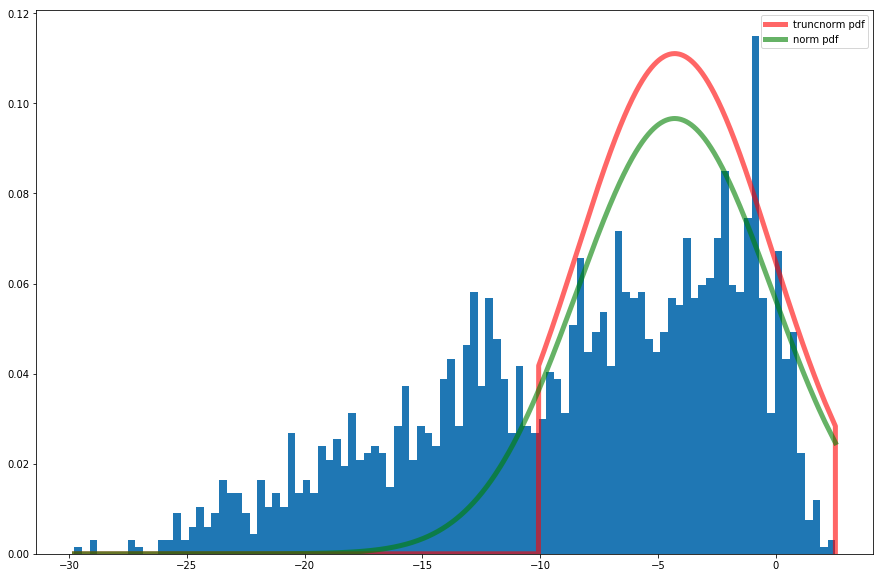

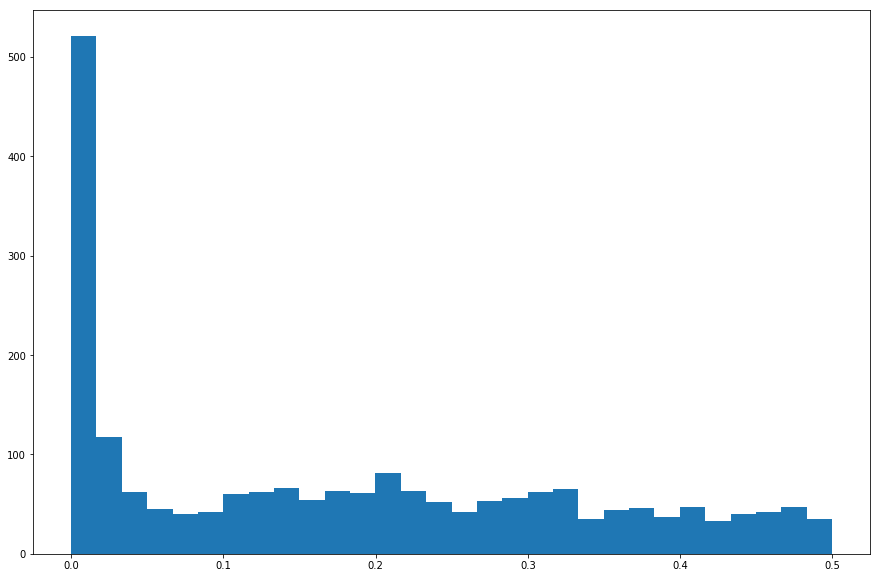

[3.37601397e-10 1.05659624e-09 1.05660336e-09 1.35505943e-08
 1.45607280e-08 1.82714228e-08 5.50439168e-08 5.55056805e-08
 8.62585936e-08 1.26370179e-07 1.30292133e-07 1.30293087e-07
 1.40842630e-07 1.45067635e-07 1.53714808e-07 1.88220269e-07
 2.04441325e-07 2.76661935e-07 3.20879651e-07 3.51492546e-07]
number of pathways with p < 0.001: 273


In [89]:
failures_of_null('TP53', 37, 99.99)

[-15.04032538 -14.36190673 -13.68152933 ...   2.42889358   2.51413239
   2.72560292]
Quantiles calculated: -2.337907349814013, 2.6817650824114088
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1246.170631086549
            Iterations: 135
            Function evaluations: 1024
            Gradient evaluations: 135
[-1.04964328  2.65495334 -0.91565657  1.35498489]


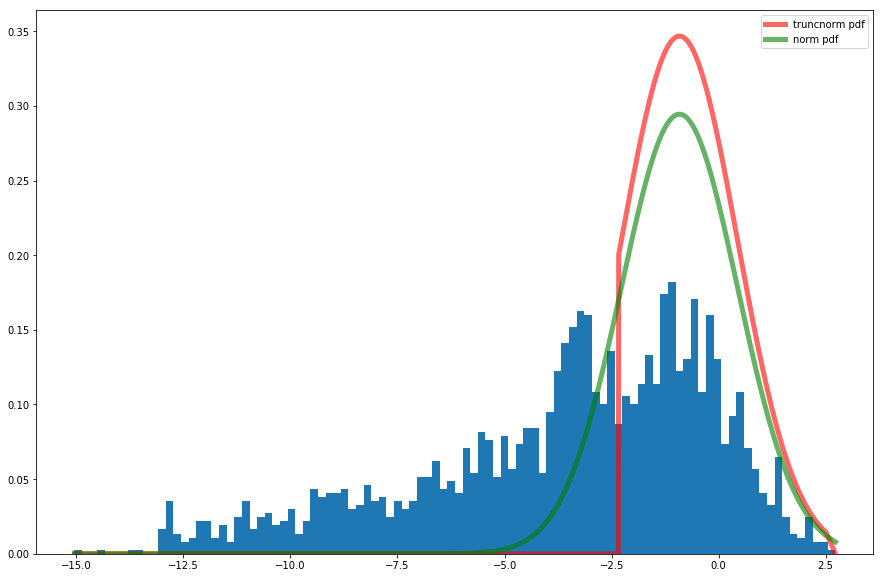

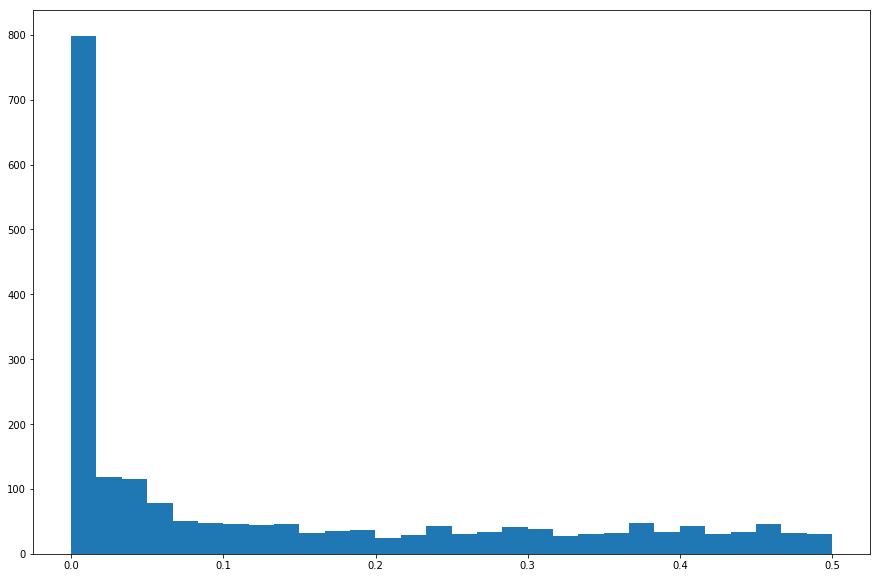

[9.61088817e-26 1.64436038e-23 2.22528094e-21 5.18191501e-21
 2.04968219e-19 2.21278840e-19 2.49233862e-19 2.80880822e-19
 3.71366793e-19 3.71367710e-19 4.44502720e-19 4.92715582e-19
 5.90436093e-19 6.72150784e-19 7.25264009e-19 7.25264994e-19
 8.63548205e-19 8.63780446e-19 9.07555104e-19 9.64709792e-19]
number of pathways with p < 0.001: 572


In [112]:
failures_of_null('PIK3CA', 57, 99.99)

[-11.18228701 -10.82268904 -10.42246601 ...   2.52551381   2.53114824
   2.54014021]
Quantiles calculated: -2.2245478230842988, 1.6711035157708323
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1045.425924289514
            Iterations: 74
            Function evaluations: 541
            Gradient evaluations: 74
[-0.71811482  1.87712821 -1.14660447  1.50107381]


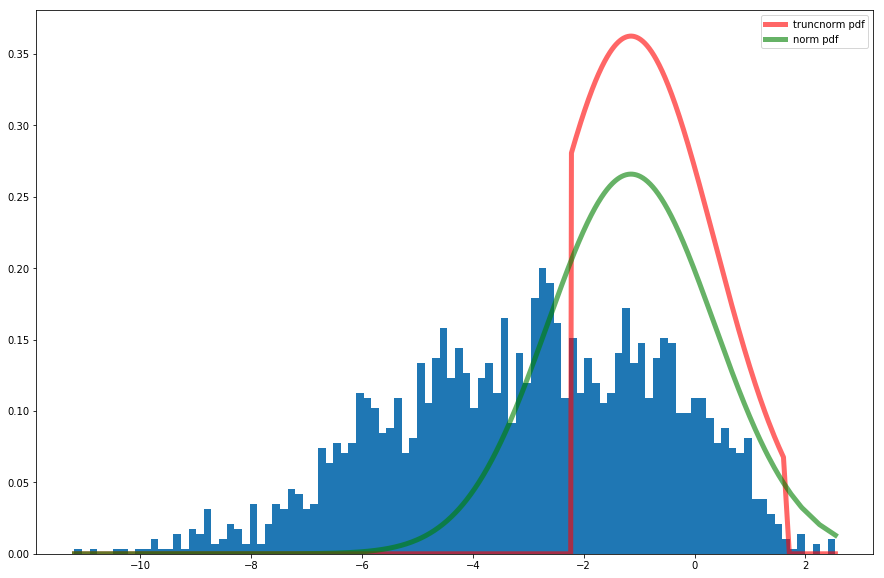

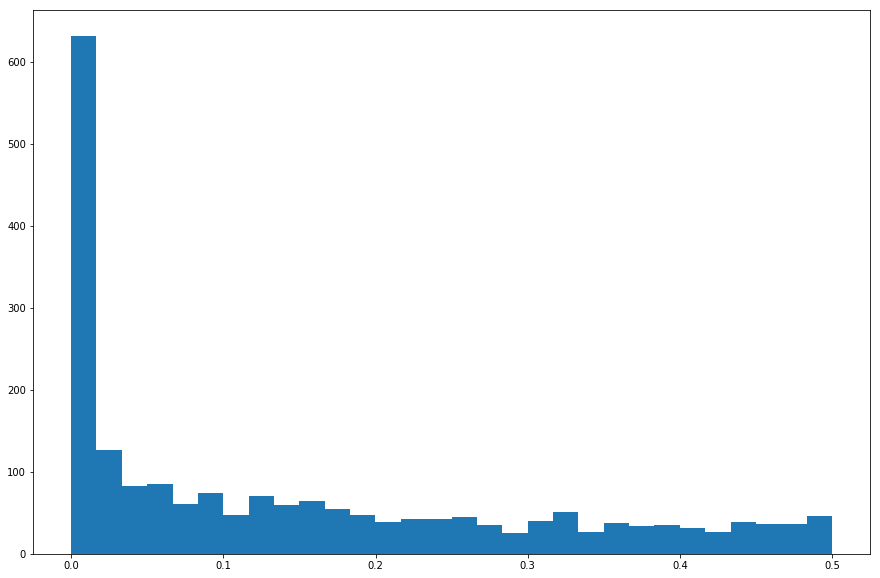

[1.14936072e-11 5.73792723e-11 3.21557294e-10 4.71555142e-10
 1.61527166e-09 3.32193224e-09 5.25335866e-09 5.26578989e-09
 6.53615492e-09 1.03926772e-08 1.48710844e-08 2.39178422e-08
 2.52822446e-08 2.69683532e-08 3.09894995e-08 4.87134665e-08
 5.82361223e-08 6.14129068e-08 7.73425855e-08 8.03434686e-08]
number of pathways with p < 0.001: 309


In [114]:
failures_of_null('GATA3', 60, 99.5)

[-8.82063638 -8.81309126 -7.5738828  ...  2.29862827  2.53903795
  2.58187306]
Quantiles calculated: -3.988694367714868, 2.572993342671591
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2773.031672657206
            Iterations: 16
            Function evaluations: 114
            Gradient evaluations: 16
[-1.27230338  2.45360242 -1.74804259  1.76109866]


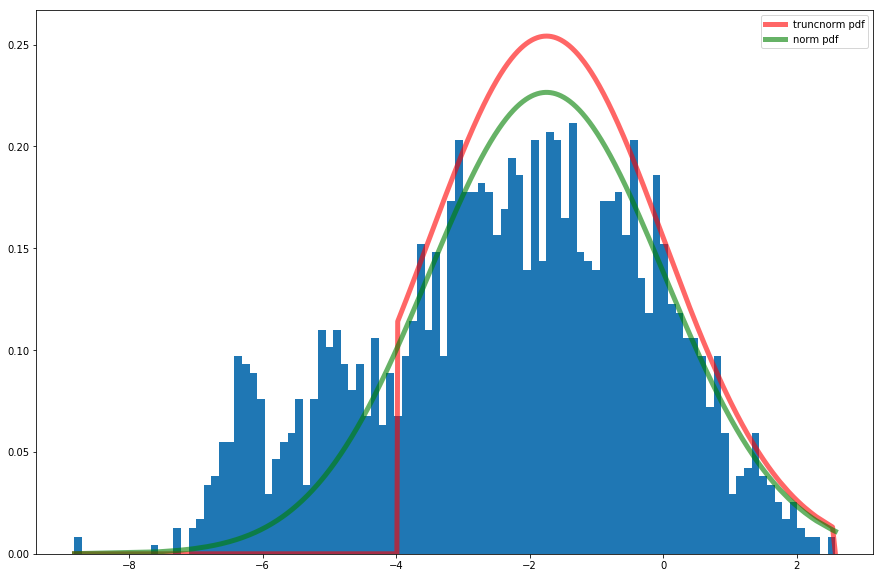

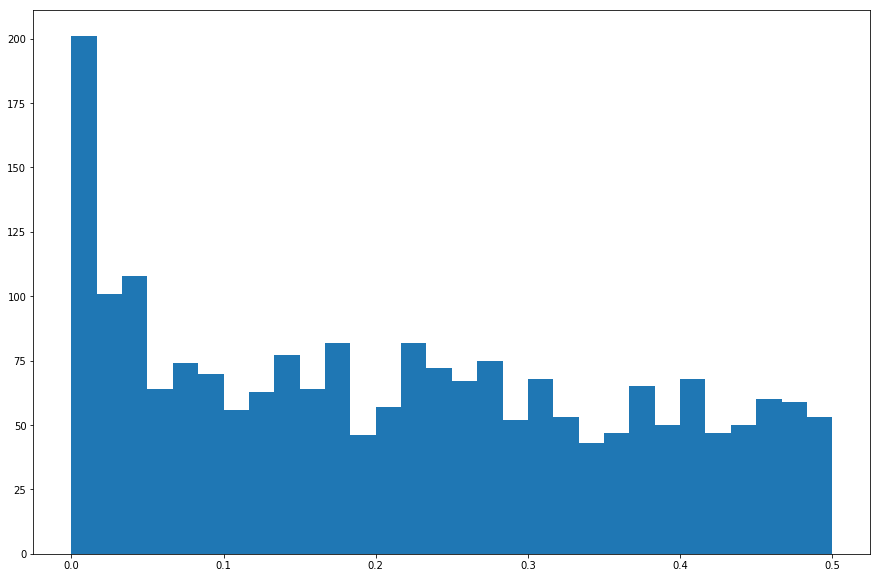

[2.95955896e-05 3.01379715e-05 4.69704177e-04 7.67450828e-04
 8.55004755e-04 8.55017055e-04 1.17585084e-03 1.36676584e-03
 1.37174556e-03 1.68926969e-03 1.71467745e-03 1.71958761e-03
 1.75897342e-03 1.78977263e-03 1.78977273e-03 1.81166804e-03
 1.81331127e-03 1.93942751e-03 1.98085019e-03 2.03560352e-03]
number of pathways with p < 0.001: 6


In [92]:
failures_of_null('CDH1', 22, 99.99)

[-7.27260701 -7.21973304 -7.21973221 ...  2.65252155  2.7798098
  2.94312735]
Quantiles calculated: -1.6095656937292109, 1.7117905545899101
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1012.6991608611593
            Iterations: 83
            Function evaluations: 610
            Gradient evaluations: 83
[-0.8729026   1.95298027 -0.58361358  1.17533401]


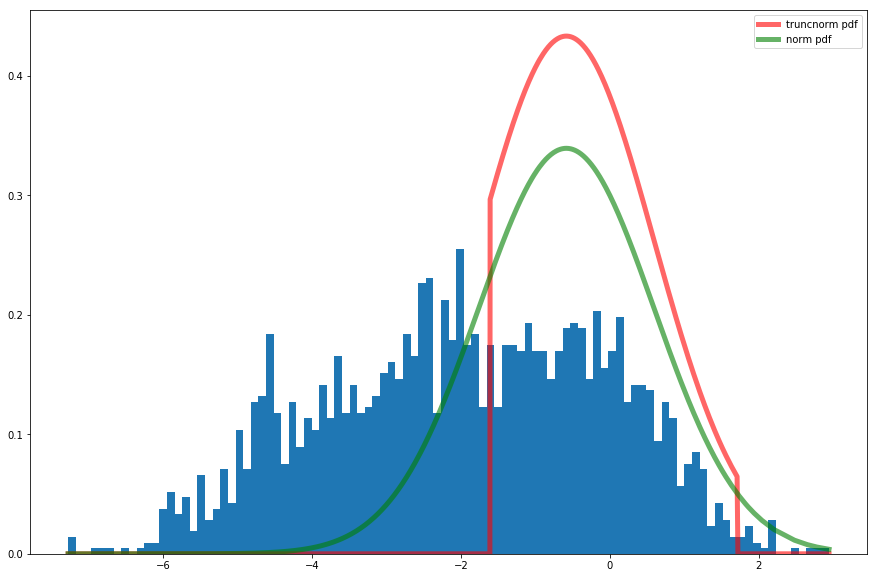

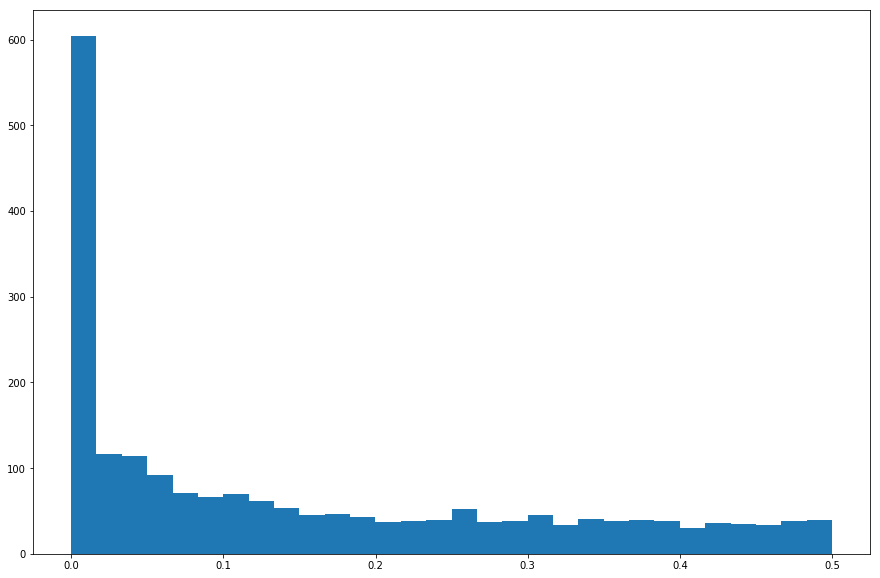

[6.30960390e-09 8.20373728e-09 8.20377097e-09 2.83395137e-08
 5.27852625e-08 1.01859893e-07 2.69191796e-07 5.64487929e-07
 9.94604419e-07 1.01701706e-06 1.22764192e-06 1.31523289e-06
 1.85461523e-06 1.92926387e-06 1.95143756e-06 2.05399998e-06
 2.07130741e-06 2.15049883e-06 2.24054827e-06 2.42748130e-06]
number of pathways with p < 0.001: 303


In [109]:
failures_of_null('MAP3K1', 55, 99)

[-5.11184482 -4.7964157  -4.59316811 ...  2.81241324  2.9907326
  3.72338093]
Quantiles calculated: -4.588129383204979, 2.7891637671094522
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3388.7408046045343
            Iterations: 5
            Function evaluations: 35
            Gradient evaluations: 5
[-2.82859462  2.96761119 -0.98795154  1.27277971]


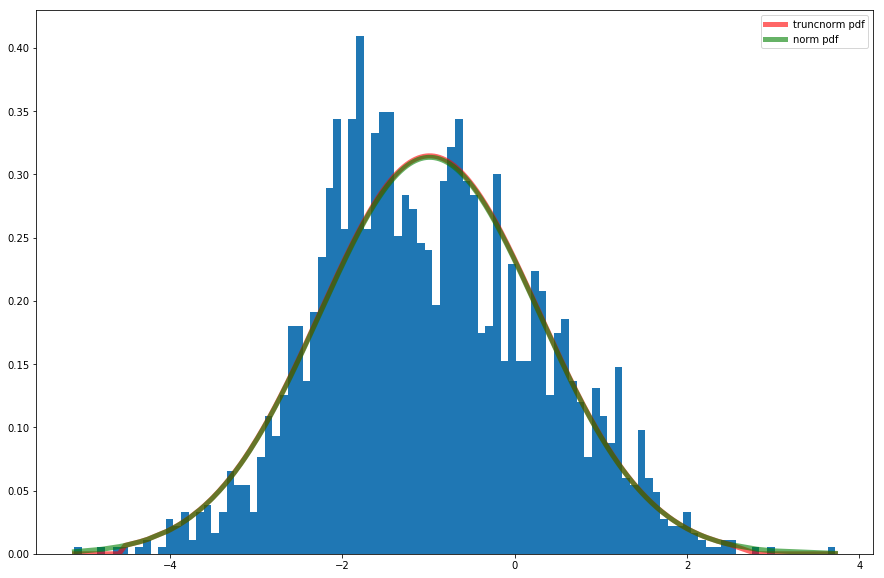

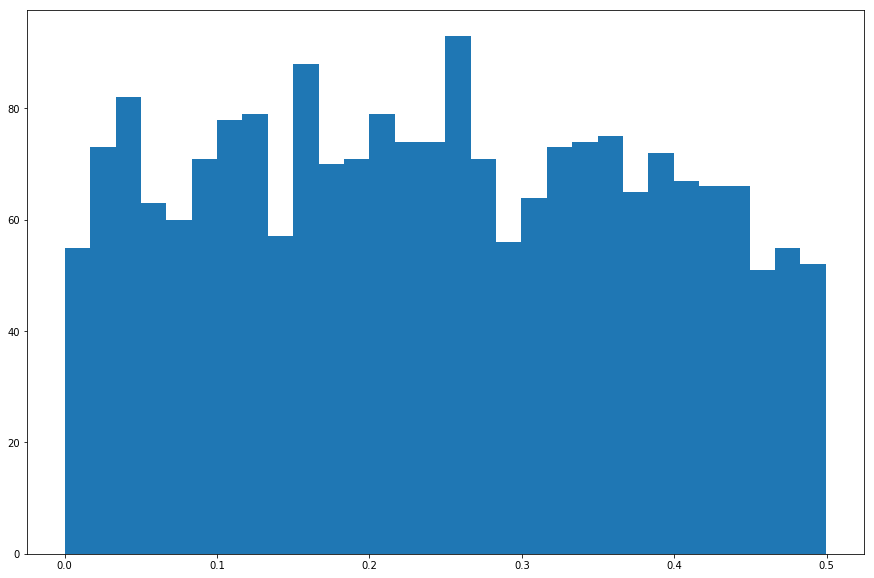

[0.00059751 0.00138469 0.00230889 0.00273201 0.00411521 0.0048598
 0.00505205 0.00799318 0.00822891 0.00829721 0.0083197  0.00870463
 0.00921342 0.0101076  0.0101077  0.01083898 0.01143769 0.0126141
 0.01267503 0.01270527]
number of pathways with p < 0.001: 3


In [94]:
failures_of_null('KMT2C', 0.1, 99.9)

[-6.99338256 -6.97690867 -6.3734443  ...  2.50005663  2.60739049
  2.75760379]
Quantiles calculated: -3.3335768781131607, 1.7680400837273313
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2968.91028733043
            Iterations: 20
            Function evaluations: 138
            Gradient evaluations: 20
[-1.35000769  2.11028375 -1.3432179   1.47433158]


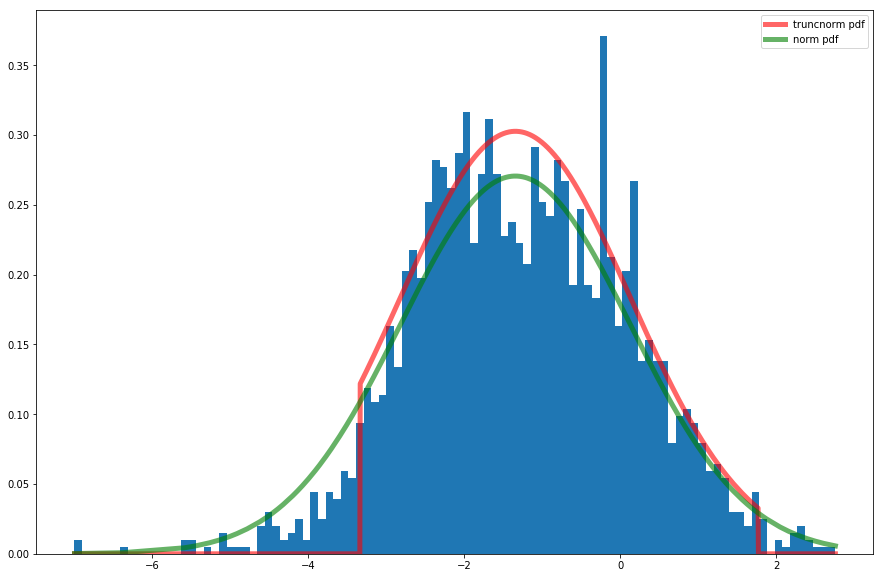

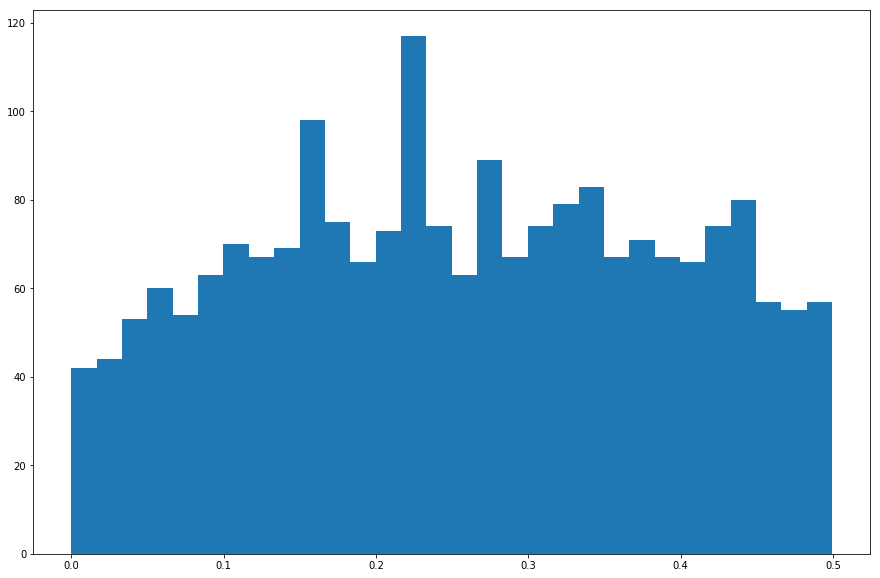

[6.34607416e-05 6.64065280e-05 3.22595418e-04 1.99305387e-03
 2.16232023e-03 2.39109986e-03 2.75411109e-03 3.93237248e-03
 5.02022881e-03 5.71351645e-03 5.94315847e-03 6.67787447e-03
 7.74013083e-03 9.87939495e-03 1.27364702e-02 1.31619462e-02
 1.32003381e-02 1.43388609e-02 1.55275654e-02 1.55601803e-02]
number of pathways with p < 0.001: 3


In [95]:
failures_of_null('AKT1', 5, 99)

[-7.5134303  -7.4629398  -7.39091613 ...  2.35693674  2.75711074
  3.2057953 ]
Quantiles calculated: -4.825463432916607, 1.2983446570135253
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3252.0434212516343
            Iterations: 9
            Function evaluations: 59
            Gradient evaluations: 9
[-1.42366482  1.59165147 -1.9341415   2.03090074]


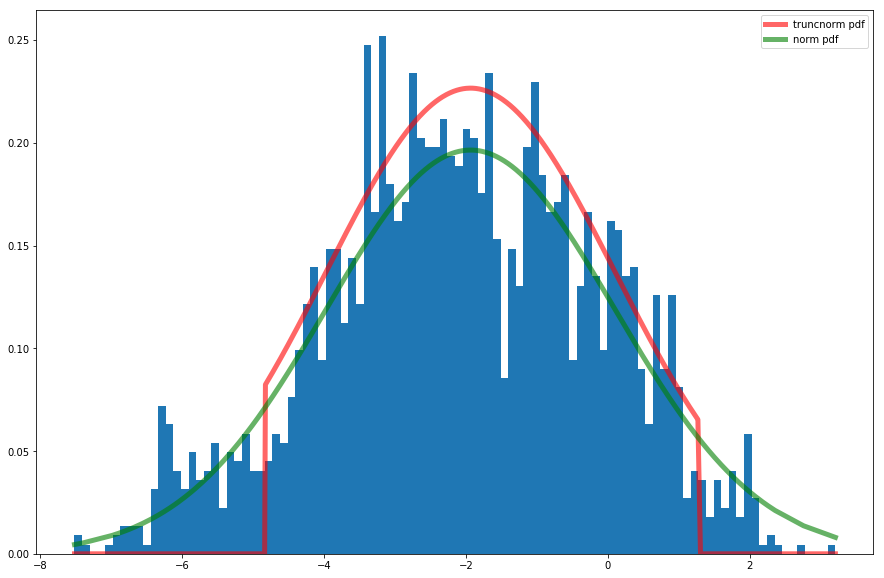

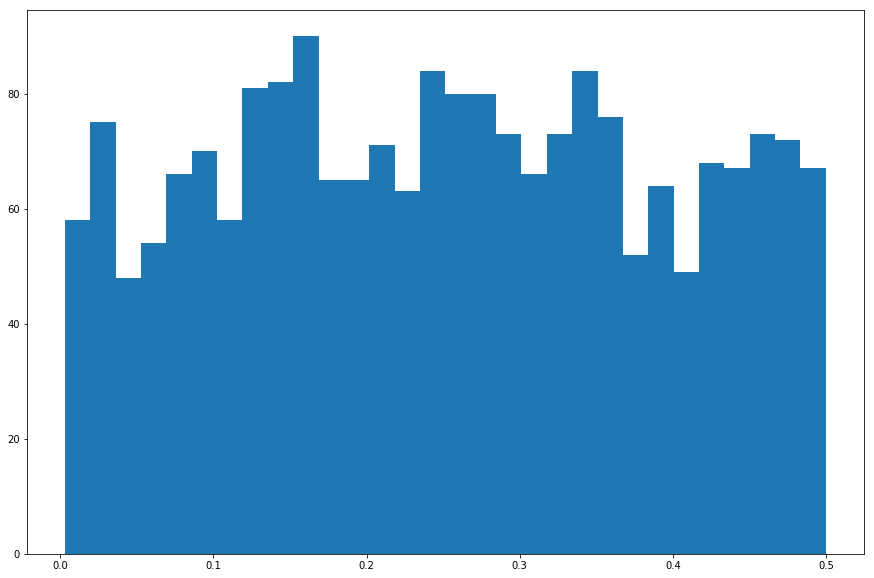

[0.00300533 0.00324109 0.00360621 0.00646352 0.00723877 0.00727366
 0.0079456  0.00812677 0.00827653 0.00897121 0.00900003 0.00984651
 0.01120915 0.01125805 0.01146062 0.01235546 0.01333075 0.01379579
 0.01395185 0.01404041]
number of pathways with p < 0.001: 0


In [96]:
failures_of_null('CBFB', 8, 97)

[-7.89904748 -7.89674191 -7.73482725 ...  2.82828018  3.02934374
  3.41982539]
Quantiles calculated: -3.2313581052985048, 2.025297285218119
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2786.861285535394
            Iterations: 73
            Function evaluations: 557
            Gradient evaluations: 73
[-1.4632282   1.69710314 -0.79753532  1.66332414]


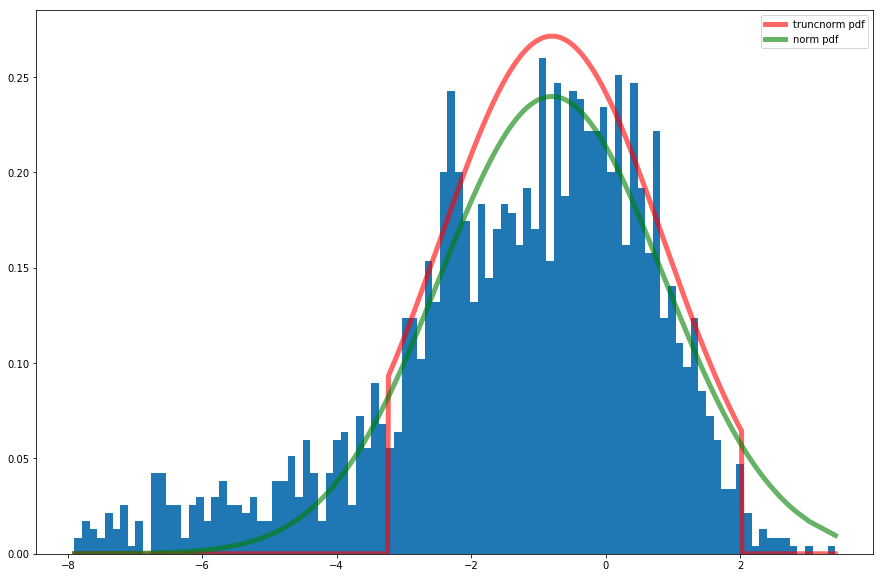

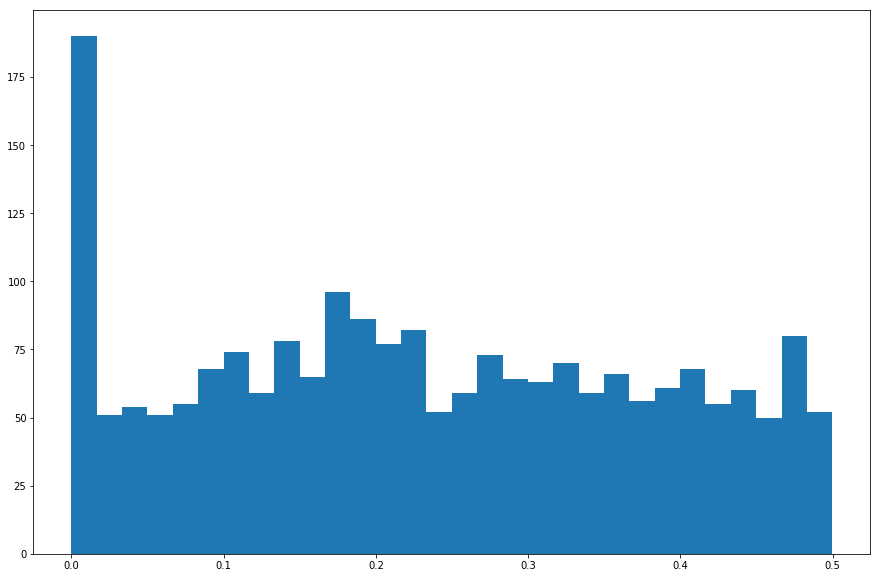

[9.79690894e-06 9.85796907e-06 1.51806288e-05 1.64539031e-05
 1.64539049e-05 1.64539351e-05 1.79450594e-05 1.85432944e-05
 2.00898017e-05 2.53050078e-05 2.70770570e-05 3.26877104e-05
 3.29029209e-05 3.48595477e-05 3.96493866e-05 4.26007768e-05
 4.56454827e-05 4.88170211e-05 5.30651140e-05 5.74687001e-05]
number of pathways with p < 0.001: 78


In [97]:
failures_of_null('RB1', 15, 99)

[-4.37692556 -3.27230042 -3.22773095 ...  2.89424005  2.96167228
  3.19681218]
Quantiles calculated: -1.120743624302626, 3.148067677125189
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1783.9059113993337
            Iterations: 23
            Function evaluations: 164
            Gradient evaluations: 23
[-0.96141975  3.0289307  -0.09223258  1.06978356]


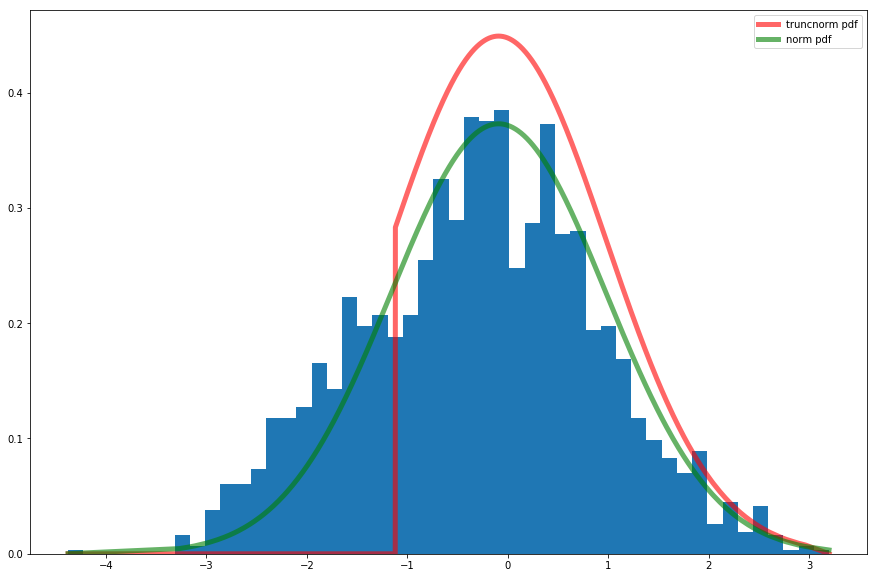

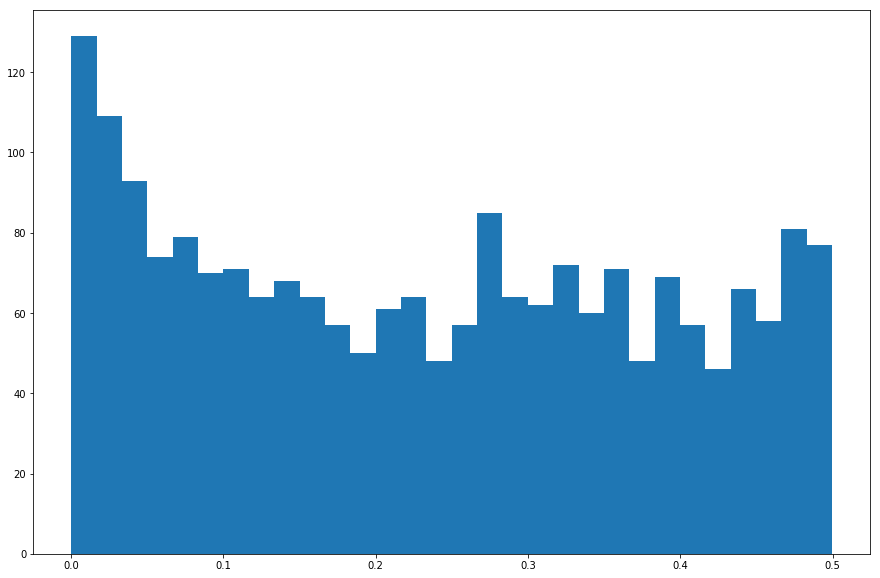

[3.09830203e-05 1.47631359e-03 1.68955322e-03 1.84411046e-03
 1.93888668e-03 1.93889424e-03 2.36236406e-03 2.93562976e-03
 3.16942141e-03 3.25165978e-03 3.35120667e-03 3.44807962e-03
 3.55760358e-03 3.63118914e-03 3.74870523e-03 3.96324045e-03
 4.42491719e-03 4.49472957e-03 4.61963348e-03 4.79378426e-03]
number of pathways with p < 0.001: 1


In [63]:
failures_of_null('BRCA1', 25, 99.99)

[-3.85050269 -3.67890308 -3.32990135 ...  3.00063379  3.19280345
  4.17697532]
Quantiles calculated: -2.3284053231616917, 2.165218733457877
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2767.838568128159
            Iterations: 8
            Function evaluations: 54
            Gradient evaluations: 8
[-1.92576284  2.17668993 -0.21901986  1.09535059]


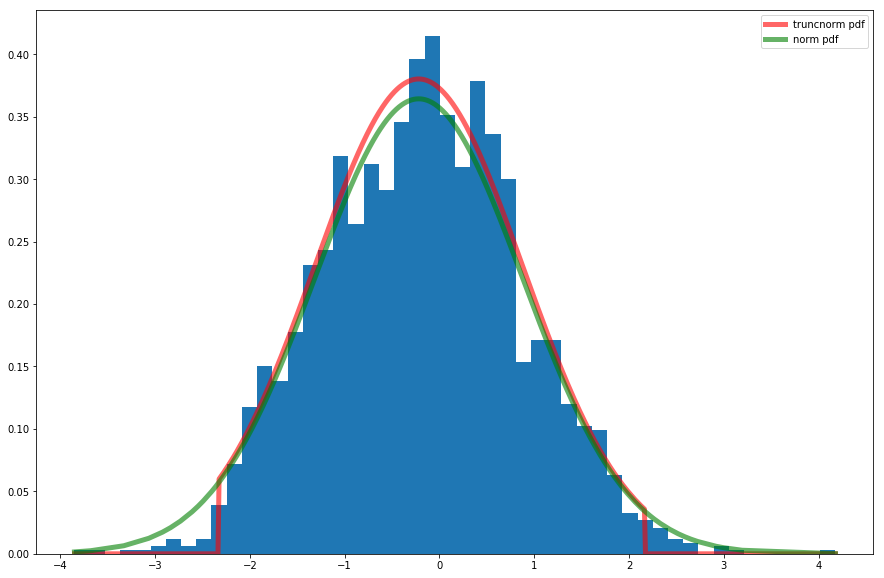

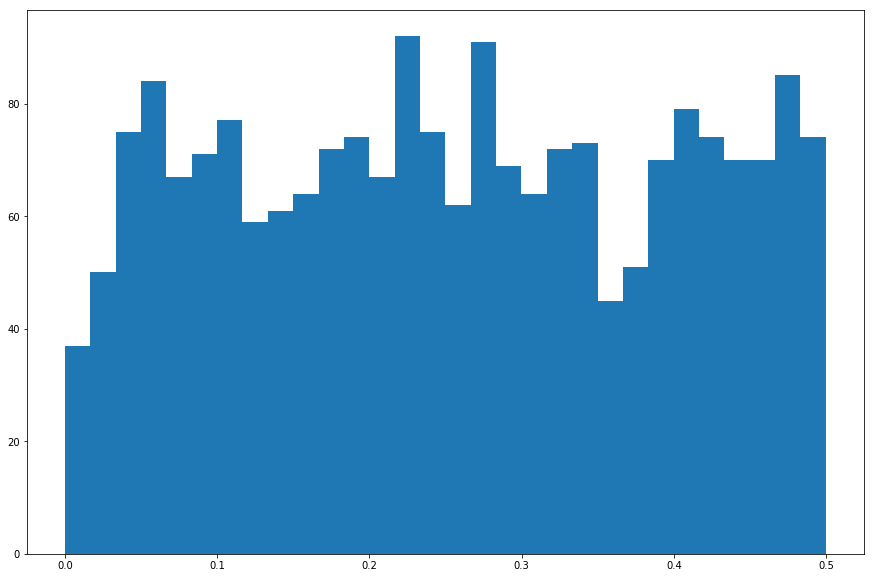

[0.00045762 0.00079237 0.00225512 0.00466492 0.00672341 0.00678816
 0.00841036 0.01042181 0.01080836 0.01086199 0.01422564 0.01452665
 0.01678857 0.01829922 0.01894188 0.01894189 0.02303162 0.0243447
 0.02474761 0.02530893]
number of pathways with p < 0.001: 4


In [66]:
failures_of_null('BRCA2', 1, 99)

In [70]:
clusterframes['TP53']

,p-values,qvalues,adjusted p-value,adjusted q-values,log adjusted p-value,cluster TP53 log adjusted q-value
Transcriptional Regulation by MECP2,5.317731e-195,1.102897e-191,3.376014e-10,7.001853e-07,9.471596,6.154787
G1 Phase,2.371171e-185,1.639485e-182,1.056596e-09,7.304651e-07,8.976091,6.136401
Cyclin D associated events in G1,2.371483e-185,1.639485e-182,1.056603e-09,7.304651e-07,8.976088,6.136401
Serine biosynthesis,1.162603e-163,6.028096e-161,1.355059e-08,6.039790e-06,7.868042,5.218978
Oncogene Induced Senescence,4.776754e-163,1.981398e-160,1.456073e-08,6.039790e-06,7.836817,5.218978
...,...,...,...,...,...,...
CREB1 phosphorylation through NMDA receptor-mediated activation of RAS signaling,9.941579e-26,2.760219e-25,4.977530e-01,4.987149e-01,0.302986,0.302148
Mineralocorticoid biosynthesis,1.071085e-25,2.965861e-25,4.986302e-01,4.993525e-01,0.302221,0.301593
Activation of Na-permeable kainate receptors,5.815190e-04,8.089003e-04,4.989479e-01,4.994295e-01,0.301945,0.301526
CD28 co-stimulation,1.066973e-25,2.958425e-25,4.996739e-01,4.997664e-01,0.301313,0.301233


In [83]:
full_clusterframe = pd.DataFrame(index=clusterframes['TP53'].index)
for i in important_mut:
    series = clusterframes[i][f'cluster {i} log adjusted q-value']
    full_clusterframe = pd.concat([full_clusterframe, series.reindex(full_clusterframe.index)], axis=1)
full_clusterframe

,cluster PIK3CA log adjusted q-value,cluster TP53 log adjusted q-value,cluster GATA3 log adjusted q-value,cluster CDH1 log adjusted q-value,cluster MAP3K1 log adjusted q-value,cluster KMT2C log adjusted q-value,cluster AKT1 log adjusted q-value,cluster CBFB log adjusted q-value,cluster RB1 log adjusted q-value
Transcriptional Regulation by MECP2,1.983310,6.154787,0.332268,0.316171,0.375185,0.327526,0.311906,0.313272,0.759901
G1 Phase,4.137721,6.136401,0.332268,0.418403,0.393167,0.327526,0.304969,0.302924,1.103960
Cyclin D associated events in G1,4.137721,6.136401,0.332268,0.418914,0.393167,0.327526,0.304969,0.302924,1.139621
Serine biosynthesis,1.063681,5.218978,0.332268,0.361564,0.393167,0.327526,0.311906,0.313272,0.900030
Oncogene Induced Senescence,4.042879,5.218978,0.326508,0.364285,0.357898,0.312771,0.311906,0.313272,1.947339
...,...,...,...,...,...,...,...,...,...
CREB1 phosphorylation through NMDA receptor-mediated activation of RAS signaling,0.514808,0.302148,0.332268,0.404798,0.356065,0.327526,0.311906,0.313272,0.340577
Mineralocorticoid biosynthesis,2.395378,0.301593,0.332268,0.364285,0.347257,0.327526,0.311906,0.313272,0.318804
Activation of Na-permeable kainate receptors,0.406760,0.301526,0.328772,0.404391,0.312584,0.319828,0.311906,0.302924,0.432937
CD28 co-stimulation,0.505560,0.301233,0.308121,0.447886,0.382595,0.327526,0.311906,0.313272,0.327743


In [87]:
adjusted_q_counts = {}
for cluster in important_mut:
    columnshape = full_clusterframe[full_clusterframe[f'cluster {cluster} log adjusted q-value'] >3].shape[0]
    adjusted_q_counts[cluster] = columnshape
print(adjusted_q_counts)

{'PIK3CA': 104, 'TP53': 138, 'GATA3': 0, 'CDH1': 0, 'MAP3K1': 0, 'KMT2C': 0, 'AKT1': 0, 'CBFB': 0, 'RB1': 0}
